# What is this notebook?
In this notebook, I'll explore Canada's International Investment Poistion (CIIP) dataset provided and maintained by [the government of Canada](https://open.canada.ca/data/en/dataset/903e50a1-64f1-4765-8ae3-a639b74d800b). First, let's introduce what IIP is. The International Investment Position , IIP, is a statistical statement that shows at a point in time the value and composition of 
* financial assets of residents of an economy that are claims on non-residents and gold bullion held as reserve assets, and
* liabiliteis of residents of an economy to non-residents. 
The difference between an economy's external financial assets and liabilities is the economy's net IIP, which may be positive or negative. ([see ref](https://ec.europa.eu/eurostat/web/products-datasets/-/tipsii14))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = './36100412-eng/36100412.csv'
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    3014 non-null   object 
 1   GEO                                         3014 non-null   object 
 2   DGUID                                       3014 non-null   object 
 3   Canada's international investment position  3014 non-null   object 
 4   Geographic region                           3014 non-null   object 
 5   Currency                                    3014 non-null   object 
 6   UOM                                         3014 non-null   object 
 7   UOM_ID                                      3014 non-null   int64  
 8   SCALAR_FACTOR                               3014 non-null   object 
 9   SCALAR_ID                                   3014 non-null   int64  
 10  VECTOR      

From above, one can see that the data consists of 17 features and 3014 observations of each. Notice that the __Non-Null count__ of almost all the features is 3014, which maches with number of observations. For the __VALUE__, __STATUS__, __SYMBOL__, and __TERMINATED__ features, however, this is not the case. Let's inspect the  _non-null_ entries of the __STATUS__ feature:

In [3]:
df.loc[~df.STATUS.isnull()][:]

,REF_DATE,GEO,DGUID,Canada's international investment position,Geographic region,Currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
29,2015-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
173,2015-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
317,2015-07,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
461,2015-10,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
605,2016-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
749,2016-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
893,2016-07,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
1037,2016-10,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
1181,2017-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
1325,2017-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0


What's more, the __VALUE__ feature of all those entries is null, and we can later safely discard them. Now, let's have a closer look at the count of the distinct observations of all the features:

In [4]:
df.nunique()

REF_DATE                                        21
GEO                                              1
DGUID                                            1
Canada's international investment position      23
Geographic region                                1
Currency                                         7
UOM                                              1
UOM_ID                                           1
SCALAR_FACTOR                                    1
SCALAR_ID                                        1
VECTOR                                         144
COORDINATE                                     144
VALUE                                         2716
STATUS                                           1
SYMBOL                                           0
TERMINATED                                       0
DECIMALS                                         1
dtype: int64

I proceed and discard all the features with 1 or less distinct observations since I can simply treat them as constants. I set the index to __REF_DATE__. I also unify all the columns' name so that they all are in lower case letters. Lastly, I rename the __Canada's international investment position__ feature and set it to be __ciip__:

In [5]:
df.drop(columns=df.columns[df.nunique() <= 1], inplace=True)

df.set_index(pd.DatetimeIndex(df.REF_DATE), inplace=True)
df.drop(columns="REF_DATE", inplace=True)

df.rename(columns={"Canada's international investment position":"ciip"}, inplace=True)
df.columns = [c.lower() for c in df.columns]

df.head()

,ciip,currency,vector,coordinate,value
REF_DATE,,,,,
2015-01-01,Total assets,All currencies,v115115376,1.1.1.1,3757118.0
2015-01-01,Total assets,Canadian dollar,v115115377,1.1.1.2,124252.0
2015-01-01,Total assets,United States dollar,v115115378,1.1.1.3,2180042.0
2015-01-01,Total assets,Euro,v115115379,1.1.1.4,357524.0
2015-01-01,Total assets,United Kingdom pound sterling,v115115380,1.1.1.5,240332.0


Here, I'll further explore each column to see what each feature is made up of. I'll begin with the __ciip__:

In [6]:
df.ciip.unique()

array(['Total assets', 'Direct investment assets',
       'Canadian portfolio investment',
       'Canadian portfolio investment, foreign debt securities',
       'Canadian portfolio investment, foreign equity and investment fund shares',
       'Official international reserves', 'Other Canadian investment',
       'Other Canadian investment, loans',
       'Other Canadian investment, currency and deposits',
       'Other Canadian investment, trade credits and advances',
       'Other Canadian investment, other accounts receivable',
       'Total liabilities', 'Direct investment liabilities',
       'Foreign portfolio investment',
       'Foreign portfolio investment, Canadian debt securities',
       'Foreign portfolio investment, Canadian equity and investment fund shares',
       'Other foreign investment', 'Other foreign investment, loans',
       'Other foreign investment, currency and deposits',
       'Other foreign investment, special drawing rights',
       'Other foreign inve

In [7]:
total_ciip = ["Total liabilities", "Total assets", "Canada's net international investment position"]
total_loc = df.ciip.isin(total_ciip)

level1_assets = ["Direct investment assets", "Canadian portfolio investment", "Official international reserves", 
                 "Other Canadian investment"]
l1a_loc = df.ciip.isin(level1_assets)

level1_liabilities = ["Direct investment liabilities", "Foreign portfolio investment", "Other foreign investment"]
l1l_loc = df.ciip.isin(level1_liabilities)


level2_assets = ["Direct investment assets", "Canadian portfolio investment, foreign debt securities", 
                 "Canadian portfolio investment, foreign equity and investment fund shares ", 
                 "Official international reserves", "Other Canadian investment, loans", 
                 "Other Canadian investment, currency and deposits", 
                 "Other Canadian investment, trade credits and advances", 
                 "Other Canadian investment, other accounts receivable"]
l2a_loc = df.ciip.isin(level2_assets)

level2_liabilities = ["Direct investment liabilities", "Foreign portfolio investment, Canadian debt securities", 
                     "Foreign portfolio investment, Canadian equity and investment fund shares", 
                     "Other foreign investment, loans", "Other foreign investment, currency and deposits", 
                     "Other foreign investment, special drawing rights", 
                     "Other foreign investment, trade credits and advances", 
                     "Other foreign investment, other accounts payable"]
l2l_loc = df.ciip.isin(level2_liabilities)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


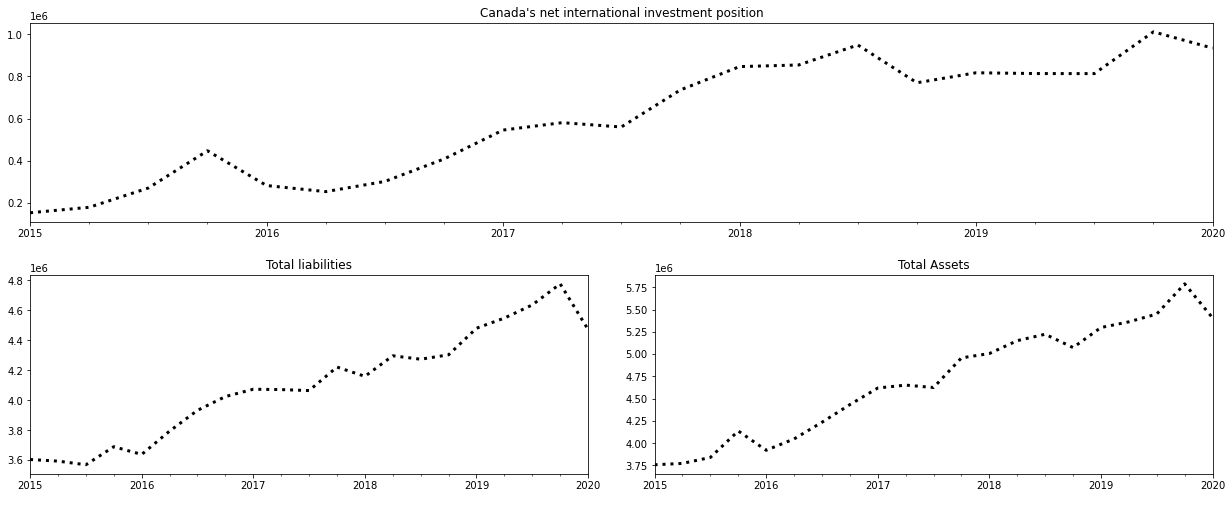

In [8]:
total_asset_df = df.loc[(df.ciip == "Total assets") & (df.currency == "All currencies")]
total_liab_df = df.loc[(df.ciip == "Total liabilities") & (df.currency == "All currencies")]
net_df = df.loc[(df.ciip == "Canada's net international investment position") & (df.currency == "All currencies")]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :])
f_ax2 = fig.add_subplot(gs[1, 0])
f_ax3 = fig.add_subplot(gs[1, 1])

fig.set_size_inches(17, 7)

total_asset_df.plot(ax=f_ax3, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

total_liab_df.plot(ax=f_ax2, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

net_df.plot(ax=f_ax1, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

f_ax3.set_title("Total Assets")
f_ax2.set_title("Total liabilities")
f_ax1.set_title("Canada's net international investment position");

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


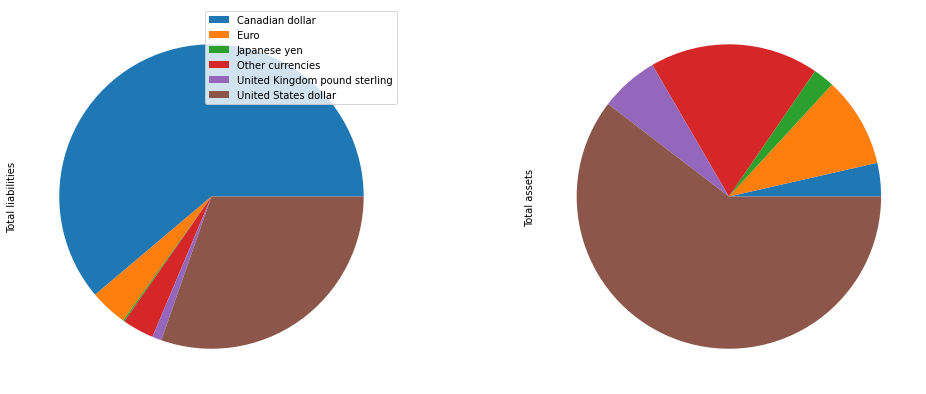

In [9]:
total_plt_loc = (total_loc) & (df.currency != "All currencies")
total_ciip_df = df.loc[total_plt_loc].groupby(by=["ciip", "currency"]).mean().unstack("ciip")

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)


total_ciip_df.iloc[:]["value"]["Total liabilities"].plot.pie(legend=True, labels=None,
ax=axes[0])

total_ciip_df.iloc[:]["value"]["Total assets"].plot.pie(legend=False, labels=None, ax=axes[1]);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


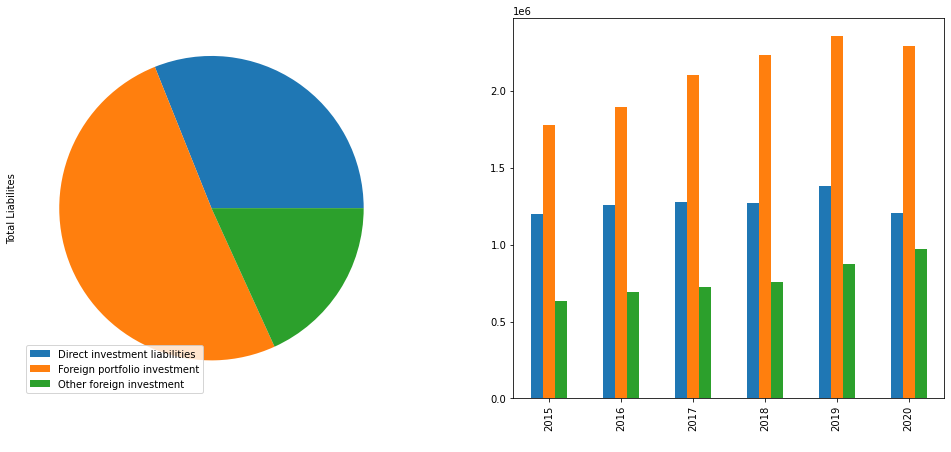

In [10]:
liab_df = df.loc[(l1l_loc) & (df.currency == "All currencies")]
asset_df = df.loc[(l1a_loc) & (df.currency == "All currencies")]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

liab_df.groupby(by=[liab_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[1], 
ylabel=" ", xlabel=" ", legend=False)

liab_df.groupby("ciip").mean().value.plot.pie(ax=axes[0],legend=True, labels=None, ylabel="Total Liabilites");

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


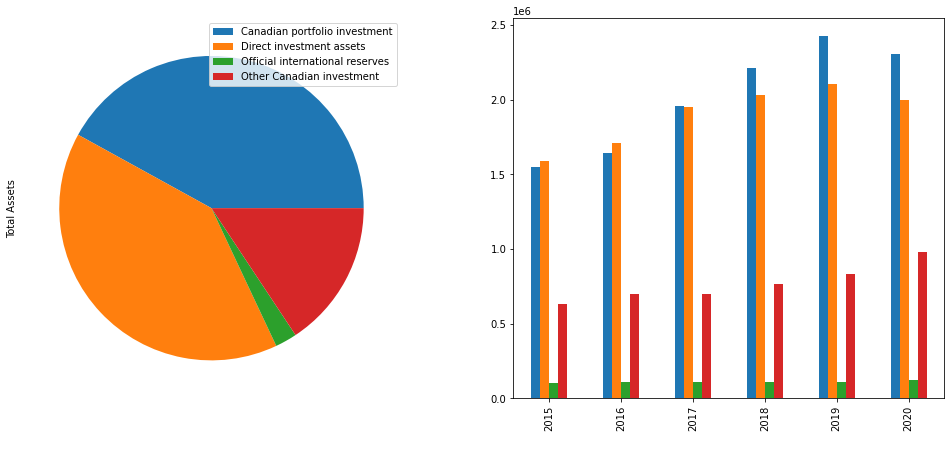

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

asset_df.groupby(by=[asset_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[1],
ylabel=" ", xlabel=" ", legend=False)

asset_df.groupby("ciip").mean().value.plot.pie(ax=axes[0], legend=True,
labels=None, ylabel="Total Assets");

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


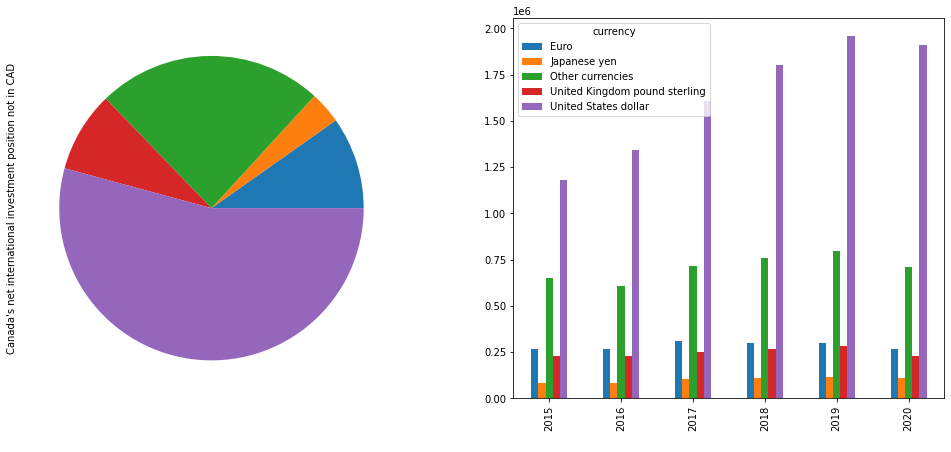

In [12]:
# Canada's average total assets/ liabilites and net IIP based on different currencies (not including CAD)

noncan_plt_loc = (total_loc) & (~ df.currency.isin(["All currencies", "Canadian dollar"]))
noncan_ciip_df = df.loc[noncan_plt_loc].groupby(by=["ciip", "currency"]).mean().unstack("ciip")
noncan_net_df = noncan_ciip_df.loc[:][("value", "Canada's net international investment position")]
noncan_total_liab_df = noncan_ciip_df.loc[:]["value"]["Total liabilities"]
noncan_total_asset_df = noncan_ciip_df.loc[:]["value"]["Total assets"]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

noncan_net_df.plot.pie(legend= False, labels=None, ax=axes[0], 
ylabel="Canada's net international investment position not in CAD");
df.loc[(noncan_plt_loc) & (df.ciip == "Canada's net international investment position")].groupby(
by=[df.loc[(noncan_plt_loc) & (df.ciip == "Canada's net international investment position")]
.index.year, "currency"]).mean().value.unstack("currency").plot.bar(ax=axes[1], ylabel=" ",
xlabel=" ", legend=True);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


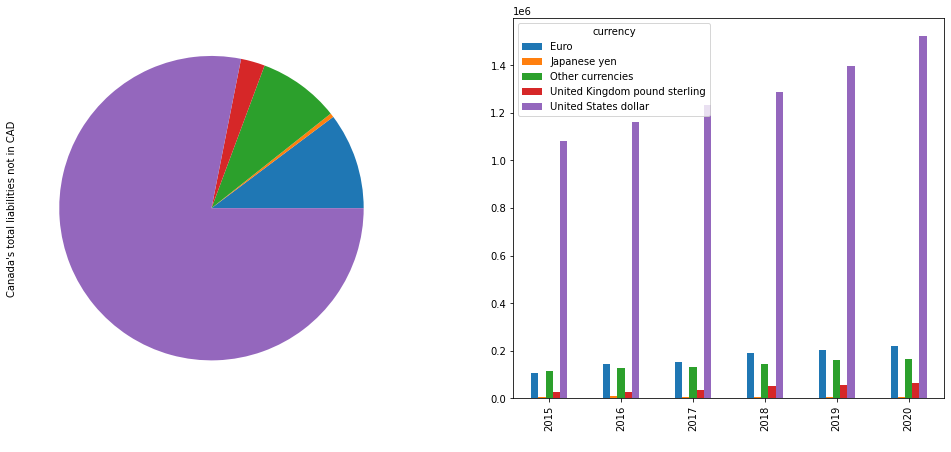

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

noncan_total_liab_df.plot.pie(legend= False, labels=None, ax=axes[0], 
ylabel="Canada's total liabilities not in CAD");
df.loc[(noncan_plt_loc) & (df.ciip == "Total liabilities")].groupby(
by=[df.loc[(noncan_plt_loc) & (df.ciip == "Total liabilities")]
.index.year, "currency"]).mean().value.unstack("currency").plot.bar(ax=axes[1], ylabel=" ",
xlabel=" ", legend=True);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


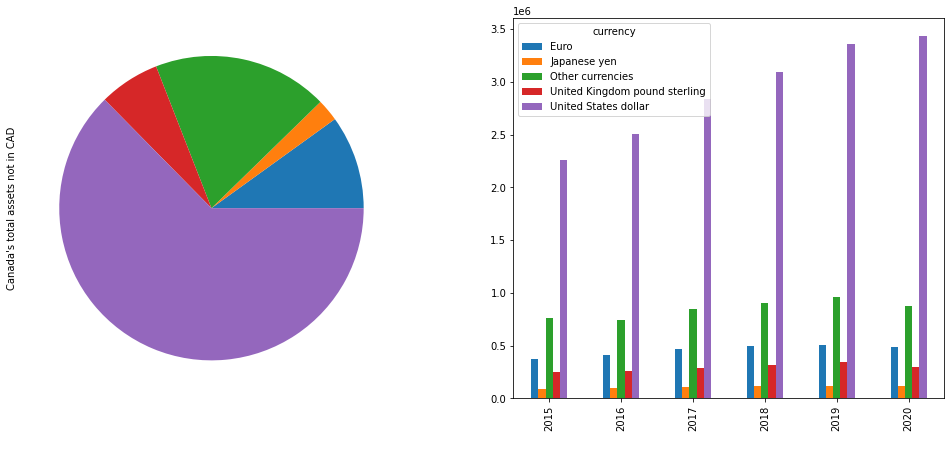

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

noncan_total_asset_df.plot.pie(legend= False, labels=None, ax=axes[0], 
ylabel="Canada's total assets not in CAD");
df.loc[(noncan_plt_loc) & (df.ciip == "Total assets")].groupby(
by=[df.loc[(noncan_plt_loc) & (df.ciip == "Total assets")]
.index.year, "currency"]).mean().value.unstack("currency").plot.bar(ax=axes[1], ylabel=" ",
xlabel=" ", legend=True);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


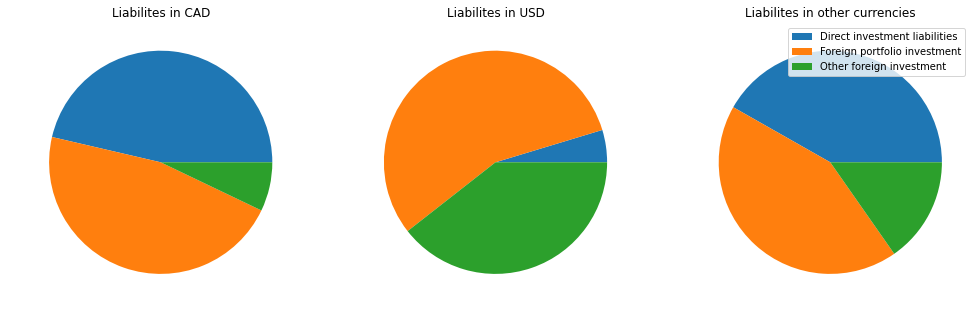

In [15]:
# Looking at the composition of the major liabilities and assets

cadliab_df = df.loc[(l1l_loc) & (df.currency == "Canadian dollar")]
usdliab_df = df.loc[(l1l_loc) & (df.currency == "United States dollar")]

noncadusd_cur_loc = ~df.currency.isin(["Canadian dollar", "United States dollar", "All currencies"])
otherliab_df = df.loc[(l1l_loc) & (noncadusd_cur_loc)]


fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(17, 7)

cadliab_df.groupby("ciip").mean().value.plot.pie(legend=False,
labels=None, title="Liabilites in CAD", ax=axes[0], ylabel=" ")

usdliab_df.groupby("ciip").mean().value.plot.pie(legend=False,
labels=None, title="Liabilites in USD", ax=axes[1], ylabel=" ")

otherliab_df.groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, title="Liabilites in other currencies", ax=axes[2], ylabel=" ");

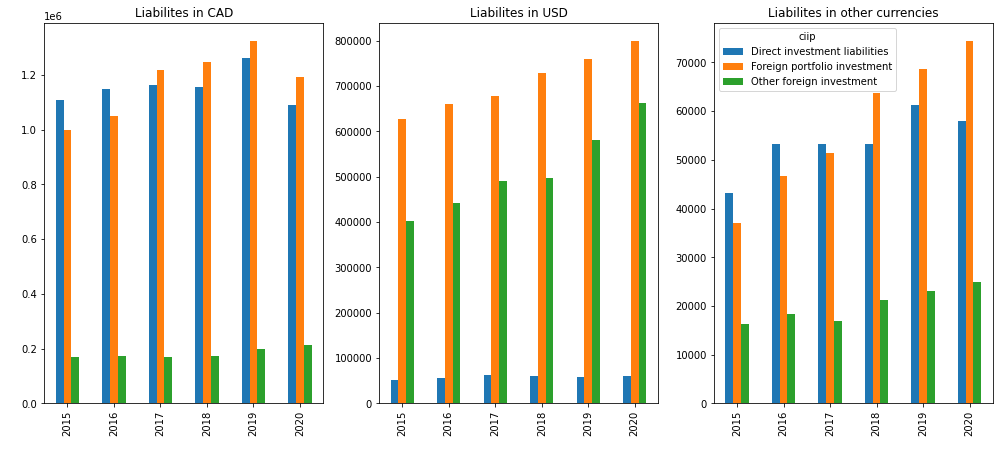

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(17, 7)

cadliab_df.groupby(by=[cadliab_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[0], 
ylabel=" ", xlabel=" ", legend=False, title="Liabilites in CAD");

usdliab_df.groupby(by=[usdliab_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[1], 
ylabel=" ", xlabel=" ", legend=False, title="Liabilites in USD");

otherliab_df.groupby(by=[otherliab_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[2], 
ylabel=" ", xlabel=" ", legend=True, title="Liabilites in other currencies");

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


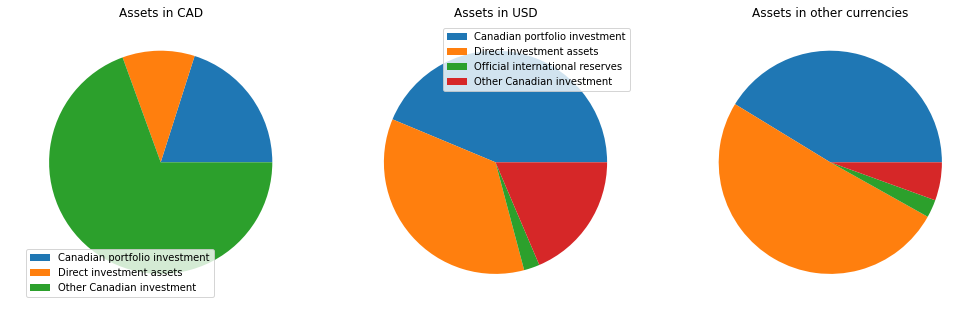

In [17]:
cadasset_df = df.loc[(l1a_loc) & (df.currency == "Canadian dollar")]
usdasset_df = df.loc[(l1a_loc) & (df.currency == "United States dollar")]
otherasset_df = df.loc[(l1a_loc) & (noncadusd_cur_loc)]

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(17, 7)

cadasset_df.groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, title="Assets in CAD", ax=axes[0], ylabel=" ")

usdasset_df.groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, title="Assets in USD", ax=axes[1], ylabel=" ");

otherasset_df.groupby("ciip").mean().value.plot.pie(legend=False,
labels=None, title="Assets in other currencies", ax=axes[2], ylabel=" ");

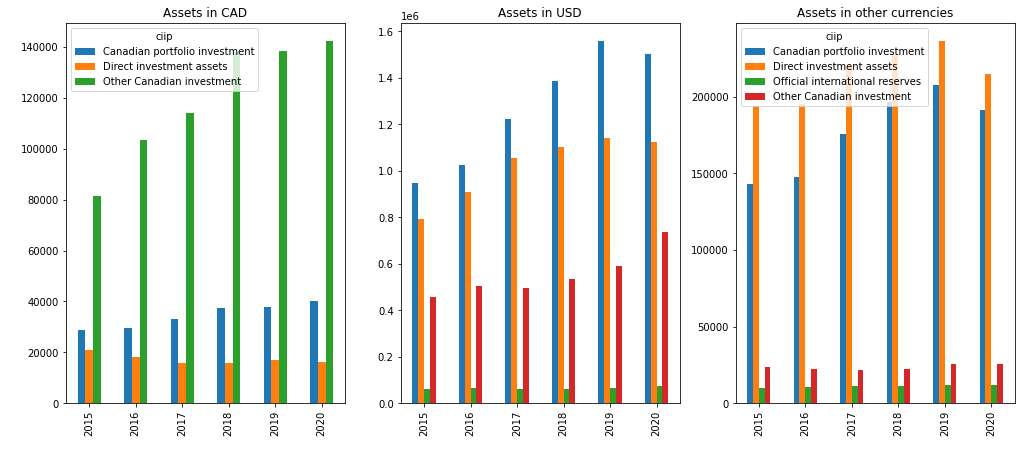

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(17, 7)

cadasset_df.groupby(by=[cadasset_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[0], 
ylabel=" ", xlabel=" ", legend=True, title="Assets in CAD");

usdasset_df.groupby(by=[usdasset_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[1], 
ylabel=" ", xlabel=" ", legend=False, title="Assets in USD");

otherasset_df.groupby(by=[otherasset_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[2], 
ylabel=" ", xlabel=" ", legend=True, title="Assets in other currencies");